# Database Analysis using Pandas

## Libraries and dependencies

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

from config import config

## Database configuration and connection

In [2]:
# Establish a connection to the database by creating a cursor object

# Obtain the configuration parameters
params = config()
# Connect to the PostgreSQL database
conn = psycopg2.connect(**params)
# Create a new cursor
cur = conn.cursor()


In [3]:
# A function that takes in a PostgreSQL query and outputs a pandas database 
def create_pandas_table(sql_query, database = conn):
    table = pd.read_sql_query(sql_query, database)
    return table


In [4]:
# Utilize the create_pandas_table function to create a Pandas data frame
# Store the data as a variable
employees_df = create_pandas_table('select e.emp_no "Employee No", e.first_name "First name", e.last_name "Last name", t.title "Title", s.salary "Salary" from employee e, salary s, title t where e.emp_no = s.emp_no and e.emp_title_id = t.title_id order by "Employee No"')
employees_df


,Employee No,First name,Last name,Title,Salary
0,10001,Georgi,Facello,Senior Engineer,60117.0
1,10002,Bezalel,Simmel,Staff,65828.0
2,10003,Parto,Bamford,Senior Engineer,40006.0
3,10004,Chirstian,Koblick,Senior Engineer,40054.0
4,10005,Kyoichi,Maliniak,Staff,78228.0
...,...,...,...,...,...
300019,499995,Dekang,Lichtner,Engineer,40000.0
300020,499996,Zito,Baaz,Senior Engineer,58058.0
300021,499997,Berhard,Lenart,Senior Engineer,49597.0
300022,499998,Patricia,Breugel,Staff,40000.0


In [5]:
# Close the cursor and connection so the server can allocate
# bandwidth to other requests
cur.close()
conn.close()


## Plots

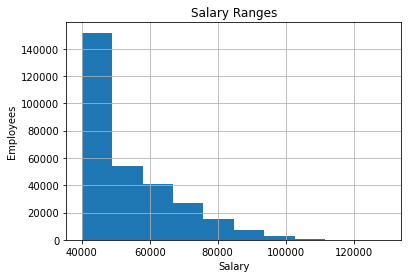

In [13]:
# Salary ranges

employees_df.hist(column = "Salary")
plt.title('Salary Ranges')
plt.xlabel('Salary')
plt.ylabel('Employees')
plt.show()


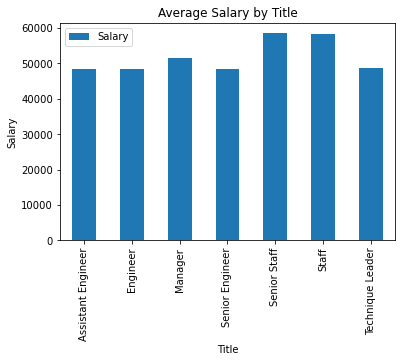

In [14]:
# Salary by title

salaryByTitle = employees_df.groupby(by = 'Title').mean()
salaryByTitle = salaryByTitle.drop( columns = ['Employee No'])

salaryByTitle.plot.bar()

plt.title('Average Salary by Title')
plt.xlabel('Title')
plt.ylabel('Salary')

plt.show()
